Suponga que en la ciudad tenemos una unidad de ciudadanos intensivos en cierto hospital y cada paciente es catalogado segun su estado de salud en alguno de los tres niveles siguientes: Estable, Delicado y Muy grave.
Estos niveles son revisados y actualizados por el personal medico cada dia a primera hora luego de la respectiva ronda medica y segun la evolucion-recuperacion de cada paciente. Suponga ademas que las probabilidades que indican si un paciente pasa de un nivel a otro son las señaladas en las siguientes estadisticas:

Supongamos que si el paciente esta en nivel estable tiene la probalilidad de 0.52 de permanecer en el mismo nivel estable o tiene una probabilidad de 0.30 de estando en estable a pasar al nivel delicado o una probabilida de 0.18 de esta en el nivel estable y pasar al nivel muy grave estas probabilidades vamos asuponer que son las determinados existeneten en usn solo dia de analisi o de evolucion del paciente, supongamos asimsmo que son las pacientes esta en el nivel delicado tiene un 0.23 de pasar al nivel estable o si esta el nivel delicado tiene un 0.35 de probabilidad de permanecer en el mismo nivel de delicado o de 0.42 de pasar a un nivel muy grave y finalmente si el paciente paciente estuviese catalogado en un dia cualquiera en el nivel muy grave tiene una probabilidad de 0.07 de pasar al nivel estable , de 0.24 de pasar al nivel delicado o de 0.69 de permanecer justamente en ese mismo nnivel muy grave


**Obtener:**
(Entregar diagrma de estados, matriz de transision y desarrollar los resultados en python)

**Determinar la probabilidad de que un paciente que se reporta en estado muy grave un dia lunes este estable al miercoles siguiente**

**Calcular el valor de la probabilidad para que una persona que esta en estado delicado el domingo registre una complicacion o mojora y deje de estar delicado al miercoles siguiente**

La matriz de transición de probabilidades entre estos estados es la siguiente:

|   | Estable | Delicado | Muy grave |
|---|---------|----------|-----------|
| **Estable**  | 0.52    | 0.30      | 0.18       |
| **Delicado** | 0.23    | 0.35      | 0.42       |
| **Muy grave**| 0.07    | 0.24      | 0.69       |

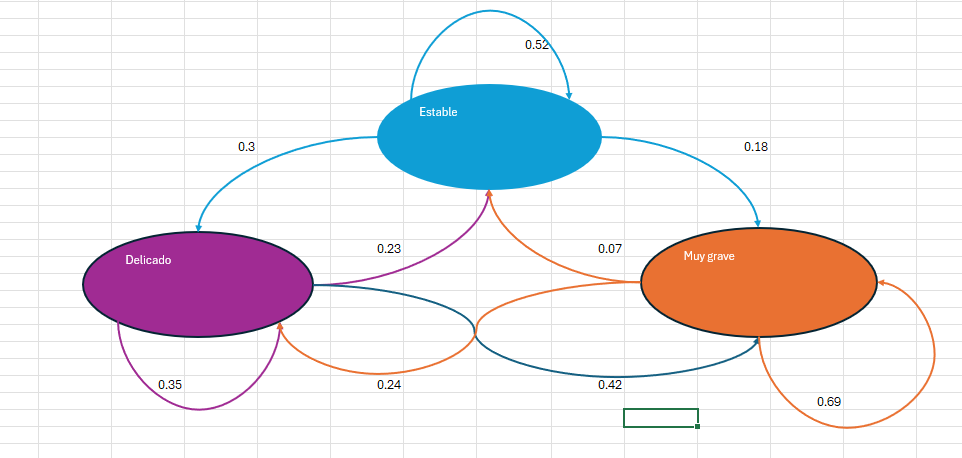

In [ ]:

import numpy as np
import pandas as pd

# Definimos la matriz de transicin basada en las probabilidades dadas
P = np.array([
    [0.52, 0.30, 0.18],  # Desde Estable
    [0.23, 0.35, 0.42],  # Desde Delicado
    [0.07, 0.24, 0.69]   # Desde Muy grave
])


In [14]:
def MultiplicaMatrices(A: np.array, B: np.array) -> np.array:
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i][j] += A[i][k] * B[k][j]
    return C

def CoincidenColumnas(M: np.array) -> bool:
    for i in range(M.shape[1]):  

        primera_valor = M[0][i]  
        for j in range(1, M.shape[0]):  
            if round(M[j][i], 10) != round(primera_valor, 10):
                return False  
    return True  

In [ ]:
#matriz estable
#sacamso la matriz que estan todas las columnas iguales
Mn=MultiplicaMatrices(P, P)
contador = 2
titulos = ["Estable", "Delicado", "Muy grave"]
M1DF = pd.DataFrame(P, columns=titulos, index=titulos)
MnDF = pd.DataFrame(Mn, columns=titulos, index=titulos)
print(f"Matriz M1 \n{M1DF}")
    

print(f"\n\nMatriz M2 \n{MnDF}")



while not CoincidenColumnas(Mn):
    contador += 1
    print(f"\n\nMatriz M{contador}")
    Mn = MultiplicaMatrices(Mn, P)
    MnDF = pd.DataFrame(Mn, columns=titulos, index=titulos)
    print(MnDF)


Matriz M1 
           Estable  Delicado  Muy grave
Estable       0.52      0.30       0.18
Delicado      0.23      0.35       0.42
Muy grave     0.07      0.24       0.69


Matriz M2 
           Estable  Delicado  Muy grave
Estable     0.3520    0.3042     0.3438
Delicado    0.2295    0.2923     0.4782
Muy grave   0.1399    0.2706     0.5895


Matriz M3
            Estable  Delicado  Muy grave
Estable    0.277072  0.294582   0.428346
Delicado   0.220043  0.285923   0.494034
Muy grave  0.176251  0.278160   0.545589


Matriz M4
            Estable  Delicado  Muy grave
Estable    0.241816  0.289028   0.469156
Delicado   0.214767  0.284654   0.500579
Muy grave  0.193819  0.281173   0.525009


Matriz M5
            Estable  Delicado  Muy grave
Estable    0.225062  0.286302   0.488636
Delicado   0.212190  0.284198   0.503612
Muy grave  0.202206  0.282558   0.515236


Matriz M6
            Estable  Delicado  Muy grave
Estable    0.217086  0.284997   0.497917
Delicado   0.210957  0.283993   0.

In [15]:

# matriz de transicion para dos y tres dias
P2 = np.linalg.matrix_power(P, 2)  # Para Lunes a miercoles (dos dias)
P3 = np.linalg.matrix_power(P, 3)  # Para Domingo a miercoles (tres dias)

# Pregunta 1: Probabilidad de que un paciente en estado "Muy grave" el lunes esté "Estable" el miercoles
prob_muygrave_estable = P2[2, 0]
print(f"Probabilidad de que un paciente en estado 'Muy grave' el lunes esté 'Estable' el miercoles: {prob_muygrave_estable:.4f}")

# Pregunta 2: Probabilidad de que un paciente en estado "Delicado" el domingo deje de estar "Delicado" el miercoles
# Esto es igual a 1 menos la probabilidad de estar en "Delicado" después de tres días
prob_delicado_to_not_delicado = 1 - P3[1, 1]
print(f"Probabilidad de que un paciente en estado 'Delicado' el domingo cambie de estado para el miercoles: {prob_delicado_to_not_delicado:.4f}")


Probabilidad de que un paciente en estado 'Muy grave' el lunes esté 'Estable' el miercoles: 0.1399
Probabilidad de que un paciente en estado 'Delicado' el domingo cambie de estado para el miercoles: 0.7141
